### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [2]:
import matplotlib.pyplot as plt

In [3]:
import folium
from folium.plugins import HeatMap

In [ ]:
import numpy as np

In [ ]:
import urllib.error

In [ ]:
from IPython.display import display

#1. Análisis de facturación



In [4]:
# Función para dar formato estilo moneda al resultado
def formato_divisa(cantidad):
    return '${:,.2f}'.format(cantidad)

# Calcular el total de ventas (Precio) para cada tienda
total_tienda1 = tienda['Precio'].sum()
total_tienda2 = tienda2['Precio'].sum()
total_tienda3 = tienda3['Precio'].sum()
total_tienda4 = tienda4['Precio'].sum()

In [5]:
# Imprimir los resultados
print(f"  El total de ventas  de la tienda 1 es : {formato_divisa(total_tienda1)}")
print(f"  El total de ventas  de la tienda 2 es : {formato_divisa(total_tienda2)}")
print(f"  El total de ventas  de la tienda 3 es : {formato_divisa(total_tienda3)}")
print(f"  El total de ventas  de la tienda 4 es : {formato_divisa(total_tienda4)}")

  El total de ventas  de la tienda 1 es : $1,150,880,400.00
  El total de ventas  de la tienda 2 es : $1,116,343,500.00
  El total de ventas  de la tienda 3 es : $1,098,019,600.00
  El total de ventas  de la tienda 4 es : $1,038,375,700.00


In [6]:
#preparando los datos para lo que sera el grafico pastel
tiendas_totales = [total_tienda1, total_tienda2, total_tienda3, total_tienda4]
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4' ]
colores_grafico_pastel = ['#00ed08','#1bc4f2','#910d75','#fa1105']

  El total de ventas  de la tienda 1 es : $1,150,880,400.00
  El total de ventas  de la tienda 2 es : $1,116,343,500.00
  El total de ventas  de la tienda 3 es : $1,098,019,600.00
  El total de ventas  de la tienda 4 es : $1,038,375,700.00


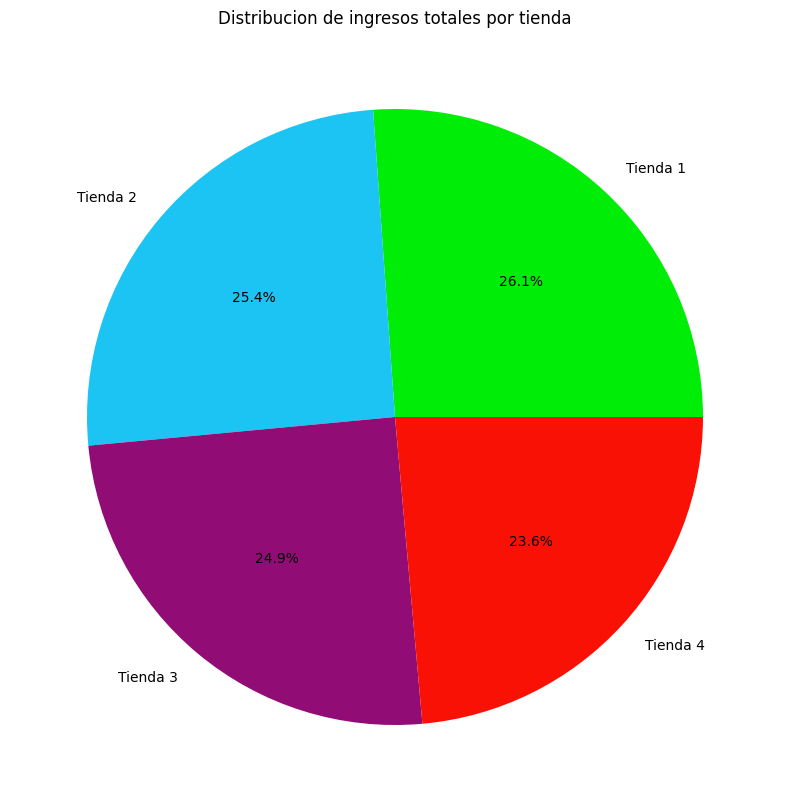

In [7]:
#verficar que haya graficos validos para que se realice el grafico

if all(cantidad > 0 for cantidad in tiendas_totales):
    # Crear el gráfico de pastel
    plt.figure(figsize=(10, 10))
    plt.pie(tiendas_totales, labels=nombres_tiendas, colors=colores_grafico_pastel, autopct='%1.1f%%')
    plt.title('Distribucion de ingresos totales por tienda')
    print(f"  El total de ventas  de la tienda 1 es : {formato_divisa(total_tienda1)}")
    print(f"  El total de ventas  de la tienda 2 es : {formato_divisa(total_tienda2)}")
    print(f"  El total de ventas  de la tienda 3 es : {formato_divisa(total_tienda3)}")
    print(f"  El total de ventas  de la tienda 4 es : {formato_divisa(total_tienda4)}")
else:

   print("No se puede generar el grafico pastel porque no hay  datos validos")

  El total de ventas  de la tienda 1 es : $1,150,880,400.00
  El total de ventas  de la tienda 2 es : $1,116,343,500.00
  El total de ventas  de la tienda 3 es : $1,098,019,600.00
  El total de ventas  de la tienda 4 es : $1,038,375,700.00


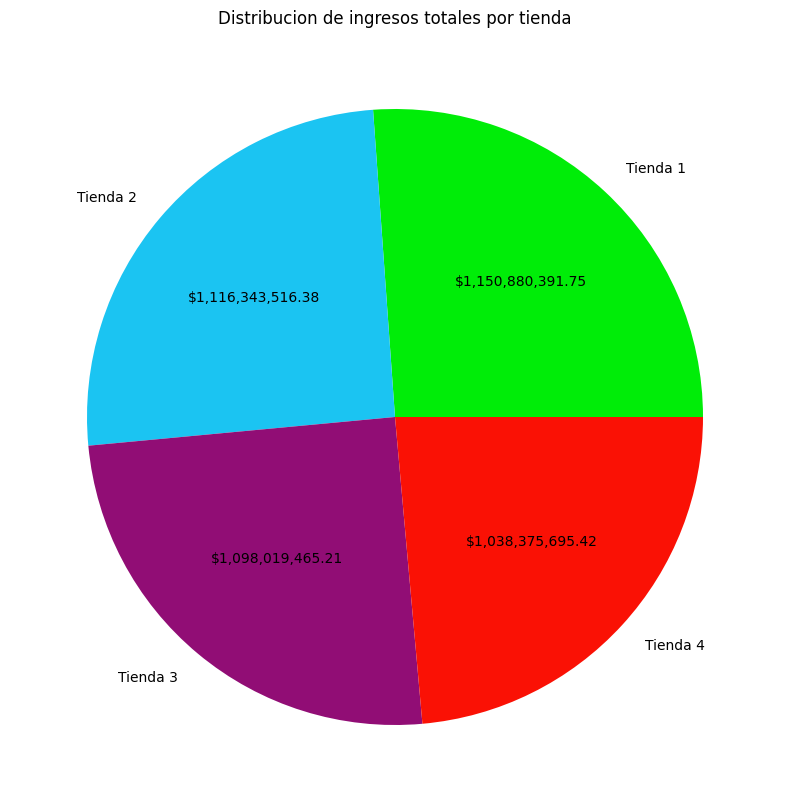

In [ ]:
if all(cantidad > 0 for cantidad in tiendas_totales):
    # Crear el gráfico de pastel
    plt.figure(figsize=(10, 10))
    plt.pie(tiendas_totales, labels=nombres_tiendas, colors=colores_grafico_pastel,
            autopct=lambda pct: formato_divisa(pct/100.*sum(tiendas_totales))) # esta linea permite que se vean los montos en el grafico
    plt.title('Distribucion de ingresos totales por tienda')
    print(f"  El total de ventas  de la tienda 1 es : {formato_divisa(total_tienda1)}")
    print(f"  El total de ventas  de la tienda 2 es : {formato_divisa(total_tienda2)}")
    print(f"  El total de ventas  de la tienda 3 es : {formato_divisa(total_tienda3)}")
    print(f"  El total de ventas  de la tienda 4 es : {formato_divisa(total_tienda4)}")
else:
   print("No se puede generar el grafico pastel porque no hay  datos validos")

# 2. Ventas por categoría


Tienda 1 - Ventas por Categoría:
    Categoría del Producto  Cantidad Vendida
0  Artículos para el hogar               171
1     Deportes y diversión               284
2        Electrodomésticos               312
3             Electrónicos               448
4   Instrumentos musicales               182
5                 Juguetes               324
6                   Libros               173
7                  Muebles               465
 la categoría con más ventas en Tienda 1: Artículos para el hogar (171 ventas)

Tienda 2 - Ventas por Categoría:
    Categoría del Producto  Cantidad Vendida
0  Artículos para el hogar               181
1     Deportes y diversión               275
2        Electrodomésticos               305
3             Electrónicos               422
4   Instrumentos musicales               224
5                 Juguetes               313
6                   Libros               197
7                  Muebles               442
 la categoría con más ventas en Tienda 2: A

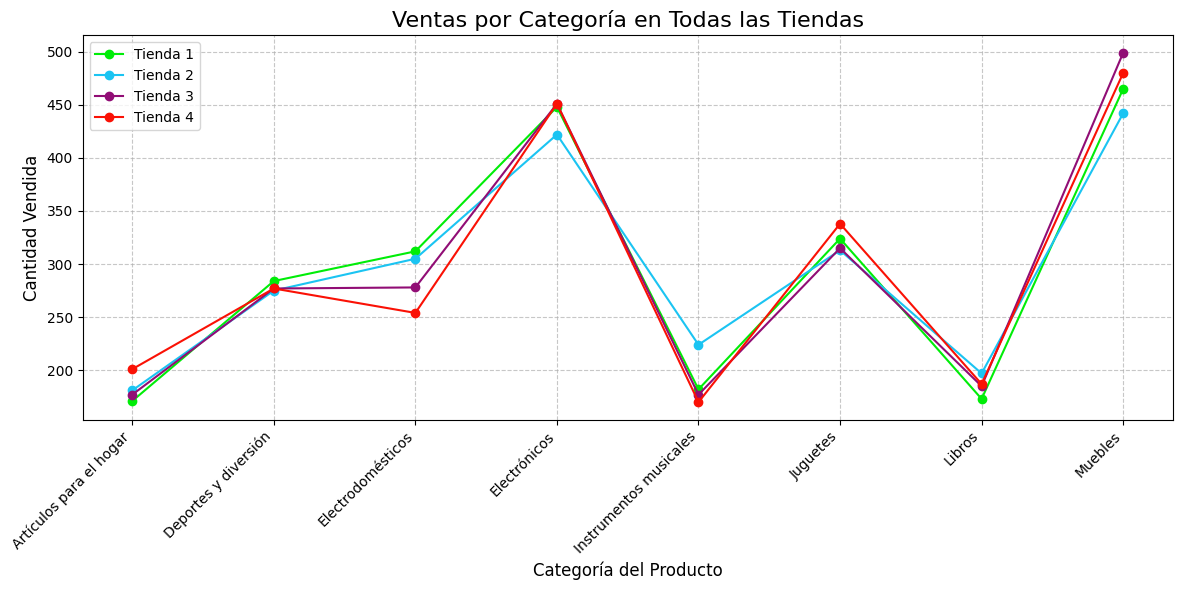

In [ ]:
# Lista de tiendas con su respectivos  datos y nombres
tiendas = [
    (tienda, "Tienda 1"),
    (tienda2, "Tienda 2"),
    (tienda3, "Tienda 3"),
    (tienda4, "Tienda 4")
]

#Lista para almacenar los datos de ventas por categoría de todas las tiendas
ventas_totales_de_tiendas =[]
categoria_unica=set()

#procesar cada tienda

for df, nombre_tienda in tiendas:  # Cambiado nombres_tiendas por nombre_tienda
    # Agrupar por Categoría del Producto y contar  todas las ventas
    ventas_por_categoria = df.groupby('Categoría del Producto').size().reset_index(name='Cantidad Vendida')

    # Ordenar por cantidad vendida de mayor a menor
    #ventas_por_categoria = ventas_por_categoria.sort_values(by='Cantidad Vendida', ascending=False)

    # Agregar datos a la lista para el gráfico
    ventas_totales_de_tiendas.append((nombre_tienda, ventas_por_categoria))  # Usando nombre_tienda

    # Actualizar el conjunto de categorías únicas
    categoria_unica.update(ventas_por_categoria['Categoría del Producto'])

    # Mostrar los resultados para cada tienda dentro del bucle
    print(f"\n{nombre_tienda} - Ventas por Categoría:")  # Usando nombre_tienda
    print(ventas_por_categoria)

    # Imprimir la categoría con más ventas para cada tienda dentro del bucle
    if not ventas_por_categoria.empty:
        categoria_mas_vendida = ventas_por_categoria.iloc[0]['Categoría del Producto']
        cantidad_mas_vendida = ventas_por_categoria.iloc[0]['Cantidad Vendida']
        print(f" la categoría con más ventas en {nombre_tienda}: {categoria_mas_vendida} ({cantidad_mas_vendida} ventas)")  # Usando nombre_tienda
    else:
        print(f"No hay datos de ventas para esta  {nombre_tienda} categoria ")  # Usando nombre_tienda


# Convertir categorías únicas a una lista ordenada
categoria_unica = sorted(categoria_unica)

# Preparando  datos para el gráfico de líneas
plt.figure(figsize=(12, 6))
colores = ['#00ed08','#1bc4f2','#910d75','#fa1105']  # verde, celeste, morado,rojo







#graficando una linea por tienda
for nombre_tienda, ventas_por_categoria in ventas_totales_de_tiendas:  # Desempaquetado de la tupla
    ventas_dict = dict(zip(ventas_por_categoria['Categoría del Producto'], ventas_por_categoria['Cantidad Vendida']))
    cantidades = [ventas_dict.get(categoria, 0) for categoria in categoria_unica]
    plt.plot(categoria_unica, cantidades, marker='o', label=nombre_tienda, color=colores[ventas_totales_de_tiendas.index((nombre_tienda, ventas_por_categoria))])  # Asignación de color


#preparando el grafico
plt.title('Ventas por Categoría en Todas las Tiendas', fontsize=16)
plt.xlabel('Categoría del Producto', fontsize=12)
plt.ylabel('Cantidad Vendida', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig(f'ventas_por_categoria.png')
plt.tight_layout()

# 3. Calificación promedio de la tienda


In [ ]:
# Lista para almacenar las calificaciones promedio por tienda (para el gráfico)
promedio_calificaciones= []
nombres_tiendas = []





# Procesar cada tienda
for df, nombre_tienda in tiendas:
    # Calcular la calificación promedio
      promedio_calificion = df['Calificación'].mean()
# Lista para almacenar las calificaciones promedio por tienda (para el gráfico)
promedio_calificaciones= []
nombres_tiendas = []





# Procesar cada tienda
for df, nombre_tienda in tiendas:
    # Calcular la calificación promedio
    promedio_calificion = df['Calificación'].mean()

    # Almacenar para el gráfico
    promedio_calificaciones.append(float(promedio_calificion))
    nombres_tiendas.append(nombre_tienda)

    # Mostrar la calificación promedio
    print(f"Calificación promedio en {nombre_tienda}: {promedio_calificion:.2f}")
    # Mostrar la calificación promedio






Calificación promedio en Tienda 1: 3.98
Calificación promedio en Tienda 2: 4.04
Calificación promedio en Tienda 3: 4.05
Calificación promedio en Tienda 4: 4.00


Text(0, 0.5, 'Calificación Promedio')

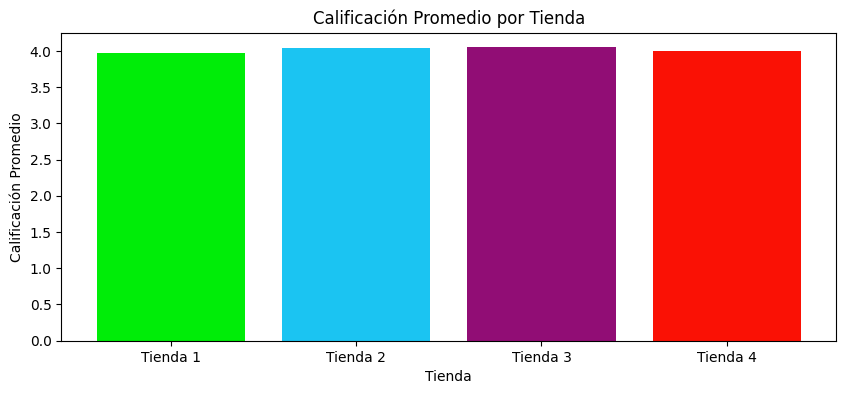

In [ ]:
# Lista de colores para cada barra (cada una representa un color diferente)

colores = ['#00ed08','#1bc4f2','#910d75','#fa1105']  # verde, celeste, morado,rojo

#Visualización de las  calificaciones promedio
plt.figure(figsize=(10, 4))
plt.bar(nombres_tiendas, promedio_calificaciones, color=colores)
plt.title('Calificación Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Calificación Promedio')

# 4. Productos más y menos vendidos


Tienda 1 - Ventas por Producto:
                       Producto  Cantidad Vendida
0                       Armario                60
1                 TV LED UHD 4K                60
2                    Microondas                60
3              Secadora de ropa                58
4                 Mesa de noche                56
5       Bloques de construcción                56
6           Balón de baloncesto                55
7                     Bicicleta                54
8                     Impresora                54
9                  Vaso térmico                54
10                 Refrigerador                54
11                      Batería                53
12                   Cubertería                52
13    Carrito de control remoto                52
14          Modelado predictivo                51
15                  Auriculares                50
16            Ajedrez de madera                49
17                    Iphone 15                49
18               

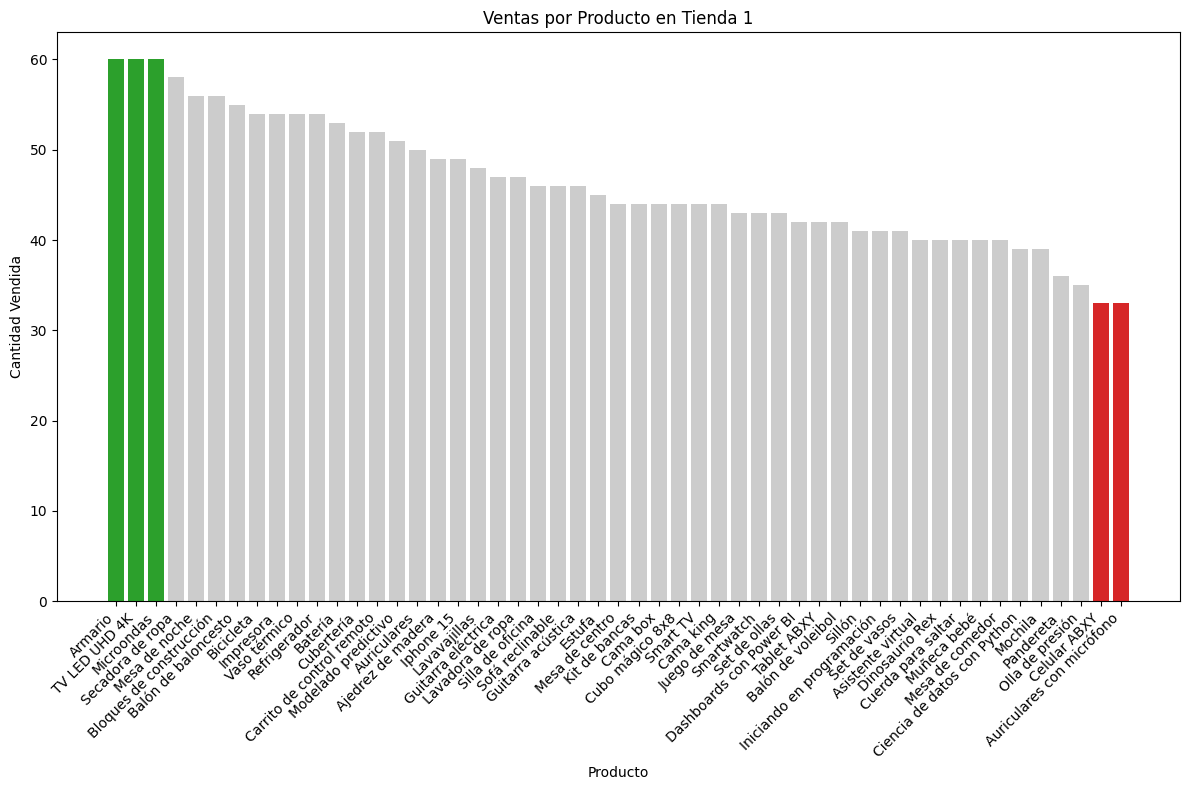


Tienda 2 - Ventas por Producto:
                       Producto  Cantidad Vendida
0     Iniciando en programación                65
1                    Microondas                62
2                       Batería                61
3                     Pandereta                58
4             Guitarra acústica                58
5              Secadora de ropa                57
6                     Iphone 15                55
7       Bloques de construcción                54
8                       Armario                54
9                  Set de ollas                52
10           Cuerda para saltar                50
11             Lavadora de ropa                49
12                 Refrigerador                49
13             Silla de oficina                49
14                  Muñeca bebé                48
15                 Vaso térmico                47
16                     Cama box                47
17    Carrito de control remoto                47
18           Guit

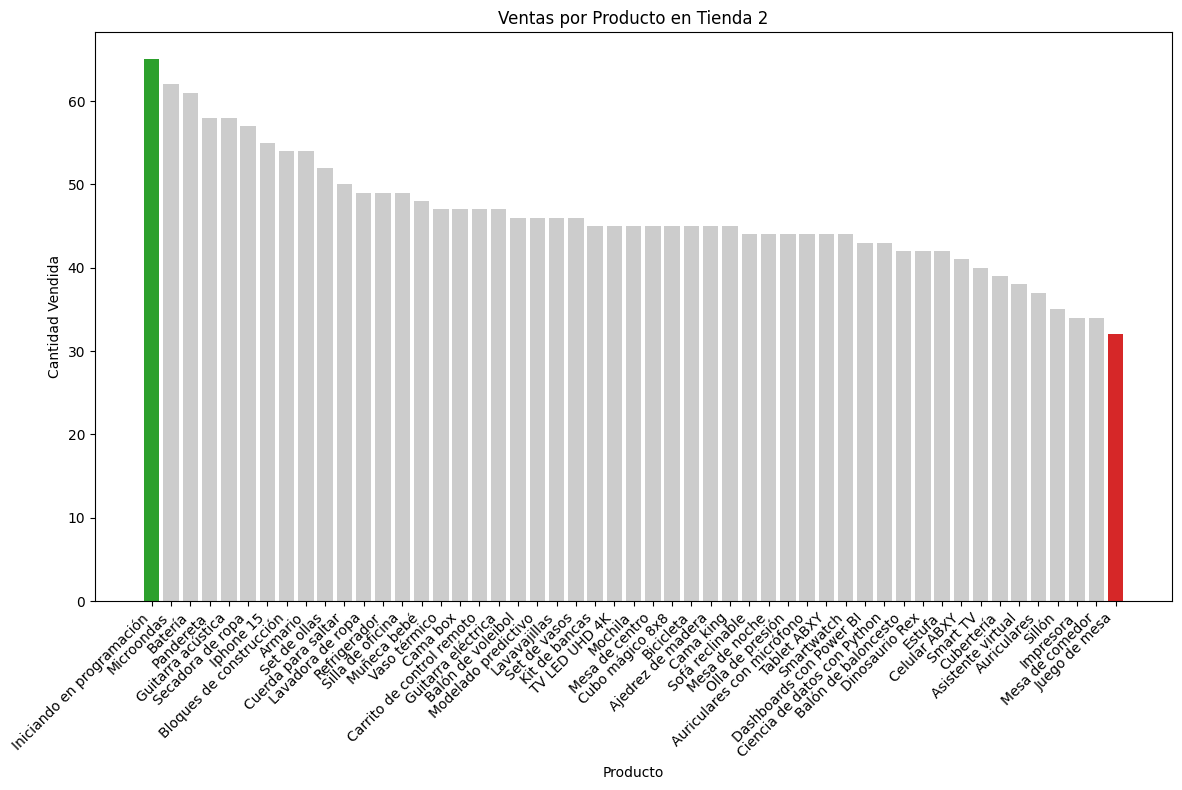


Tienda 3 - Ventas por Producto:
                       Producto  Cantidad Vendida
0                 Kit de bancas                57
1               Mesa de comedor                56
2                     Cama king                56
3                  Set de ollas                55
4                 Mesa de noche                55
5                      Smart TV                54
6           Modelado predictivo                53
7            Cuerda para saltar                53
8                        Estufa                53
9     Carrito de control remoto                52
10                Juego de mesa                52
11                 Lavavajillas                52
12                    Bicicleta                52
13                    Pandereta                51
14          Balón de baloncesto                50
15                 Refrigerador                50
16                    Impresora                50
17                      Armario                49
18            Bal

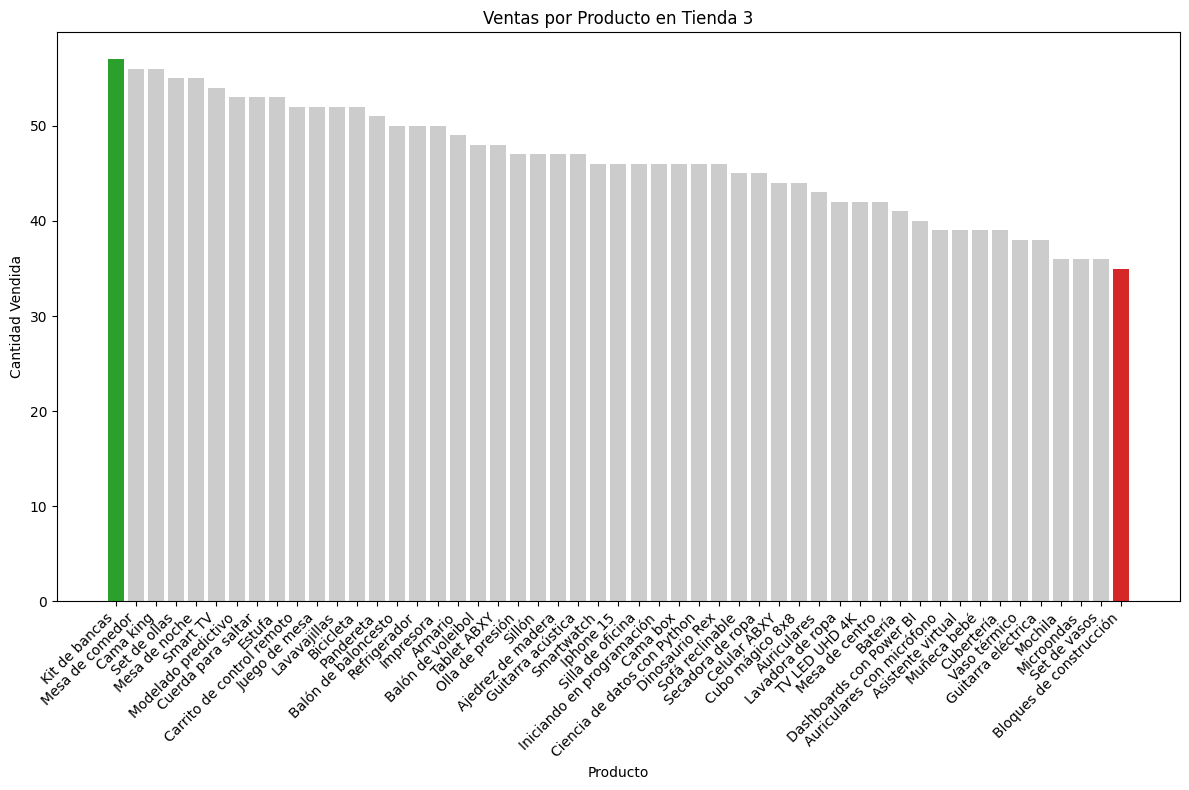


Tienda 4 - Ventas por Producto:
                       Producto  Cantidad Vendida
0                      Cama box                62
1                    Cubertería                59
2                     Cama king                56
3       Dashboards con Power BI                56
4     Carrito de control remoto                55
5                 Mesa de noche                55
6               Mesa de comedor                55
7       Bloques de construcción                54
8                      Smart TV                54
9                     Pandereta                52
10            Asistente virtual                50
11          Balón de baloncesto                50
12                    Impresora                50
13                 Set de ollas                50
14          Modelado predictivo                50
15                    Iphone 15                48
16            Balón de voleibol                48
17                      Batería                48
18               

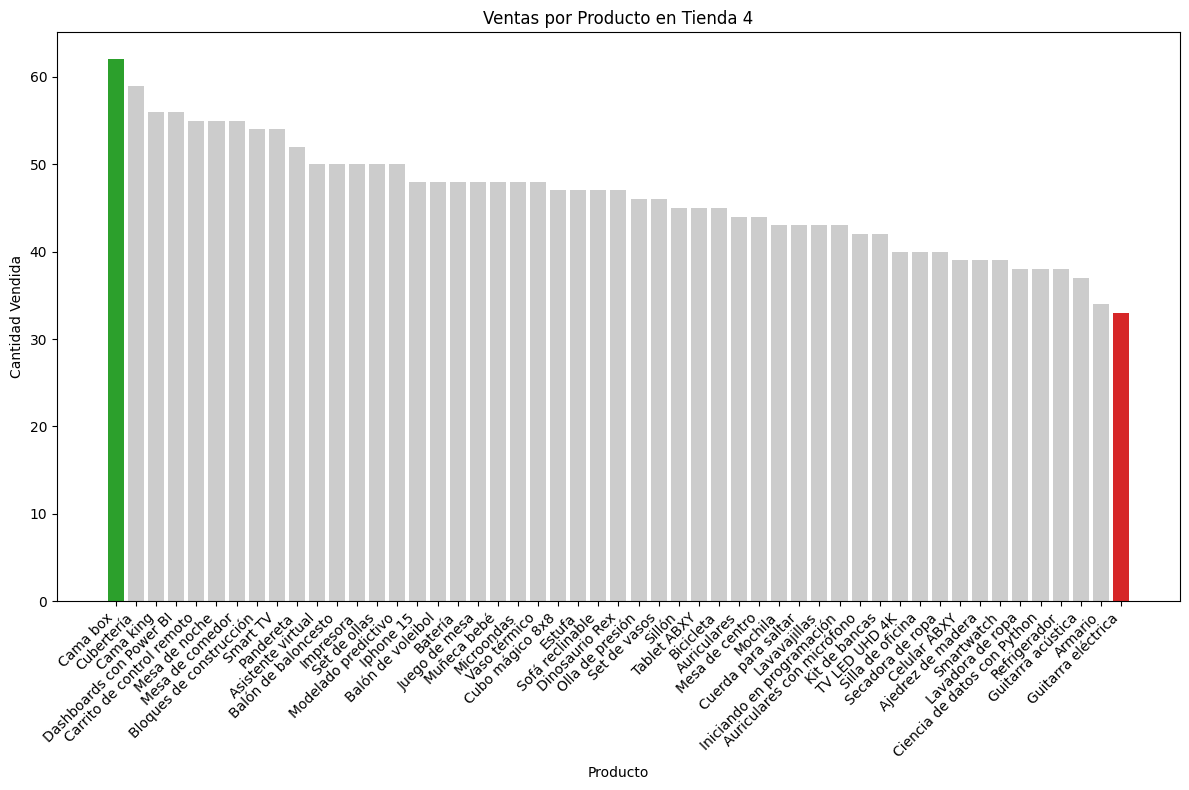

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Lista de tiendas con su respectivos  datos y nombres
tiendas = [
    (tienda, "Tienda 1"),
    (tienda2, "Tienda 2"),
    (tienda3, "Tienda 3"),
    (tienda4, "Tienda 4")
]

# procesamiento de cada tienda
for df, nombre_tienda in tiendas:
    # Agrupar por Producto y contar las ventas
    ventas_por_producto = df.groupby('Producto').size().reset_index(name='Cantidad Vendida')

    # Ordenar por cantidad vendida de mayor a menor
    ventas_por_producto = ventas_por_producto.sort_values(by='Cantidad Vendida', ascending=False)

    # Restablecer el índice para que sea consecutivo
    ventas_por_producto = ventas_por_producto.reset_index(drop=True)

    #verificar si hay datos
    if ventas_por_producto.empty:
        print(f"No hay datos de ventas para esta tienda: {nombre_tienda}")
        continue

    #Identificar el producto mas vendido
    maximo_de_ventas = ventas_por_producto ['Cantidad Vendida'].max()
    productos_mas_vendidos = ventas_por_producto[ventas_por_producto['Cantidad Vendida'] == maximo_de_ventas]['Producto'].tolist()

    # Identificar el producto menos vendido
    minimo_de_ventas = ventas_por_producto['Cantidad Vendida'].min()
    productos_menos_vendidos = ventas_por_producto[ventas_por_producto['Cantidad Vendida'] == minimo_de_ventas]['Producto'].tolist()

    # Mostrar resultados
    print(f"\n{nombre_tienda} - Ventas por Producto:")
    print(ventas_por_producto)
    print(f"Producto(s) más vendido(s): {', '.join(productos_mas_vendidos)} ({maximo_de_ventas} ventas)")
    print(f"Producto(s) menos vendido(s): {', '.join(productos_menos_vendidos)} ({minimo_de_ventas} ventas)")

    # Visualización individual para cada tienda
    plt.figure(figsize=(12, 8)) # Crear una nueva figura para cada gráfico

    # Crear lista de colores: verde para más vendido, rojo para menos vendido, gris para otros
    colores = []
    for _, row in ventas_por_producto.iterrows():
        if row['Producto'] in productos_mas_vendidos:
            colores.append('#2ca02c')  # Verde para más vendido
        elif row['Producto'] in productos_menos_vendidos:
            colores.append('#d62728')  # Rojo para menos vendido
        else:
            colores.append('#cccccc')  # Gris para otros

    plt.bar(ventas_por_producto['Producto'], ventas_por_producto['Cantidad Vendida'], color=colores)
    plt.title(f'Ventas por Producto en {nombre_tienda}')
    plt.xlabel('Producto')
    plt.ylabel('Cantidad Vendida')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show() # Mostrar el gráfico

# 5. Envío promedio por tienda

Costo de envío promedio en Tienda 1: $26,018.61
Costo de envío promedio en Tienda 2: $25,216.24
Costo de envío promedio en Tienda 3: $24,805.68
Costo de envío promedio en Tienda 4: $23,459.46


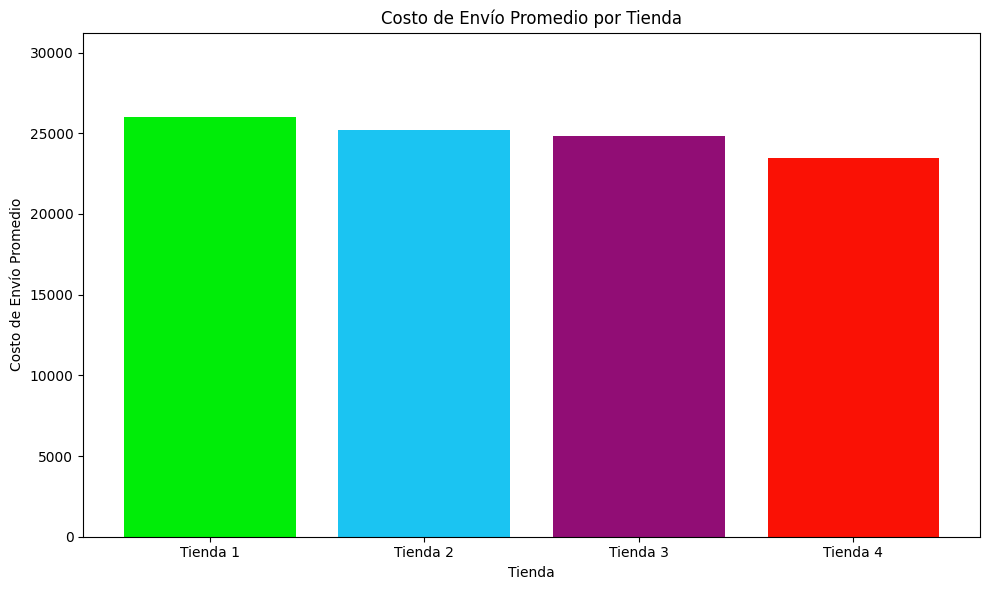

In [ ]:
# Lista para almacenar los costos de envío promedio por tienda (para el gráfico)
costos_promedio_envio_lista = [] # Cambiado el nombre de la variable para almacenar la lista
nombres_tiendas = []


# Procesar cada tienda
for df, nombre_tienda in tiendas:
    try:
        # Verificar que la columna 'Costo de envío' existe
        if 'Costo de envío' not in df.columns:
            print(f"Error: La columna 'Costo de envío' no existe en {nombre_tienda}")
            costos_promedio_envio_lista.append(0) # Usar la lista correcta
            nombres_tiendas.append(nombre_tienda)
            continue
        # Convertir la columna 'Costo de envío' a numérico, forzando errores a NaN
        df['Costo de envío'] = pd.to_numeric(df['Costo de envío'], errors='coerce')

        # Calcular el costo de envío promedio (ignorando NaN)
        promedio_actual_envio = df['Costo de envío'].mean() # Usar un nuevo nombre para el promedio actual

        # Manejar caso de datos vacíos o todos NaN
        if pd.isna(promedio_actual_envio):
            print(f"Advertencia: No hay costos de envío válidos en {nombre_tienda}")
            promedio_actual_envio = 0

        # Almacenar para el gráfico
        costos_promedio_envio_lista.append(promedio_actual_envio) # Añadir el promedio actual a la lista
        nombres_tiendas.append(nombre_tienda)

        # Mostrar el costo de envío promedio
        print(f"Costo de envío promedio en {nombre_tienda}: {formato_divisa(promedio_actual_envio)}") # Mostrar el promedio actual

    except Exception as e:
        print(f"Error al procesar {nombre_tienda}: {e}")
        costos_promedio_envio_lista.append(0) # Usar la lista correcta
        nombres_tiendas.append(nombre_tienda)


# Imprimir los valores de costos_envio_promedio_lista para depuración
#print("\nValores de costos de envío promedio para el gráfico:", costos_promedio_envio_lista)

# Visualización de costos promedio de envio
plt.figure(figsize=(10, 6))
# Lista de colores para cada barra (una por tienda)




colores = ['#00ed08','#1bc4f2','#910d75','#fa1105']  # verde, celeste, morado,rojo

# Usar la lista correcta para el gráfico
plt.bar(nombres_tiendas, costos_promedio_envio_lista, color=colores)
plt.title('Costo de Envío Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Costo de Envío Promedio')
# Ajustar el eje Y dinámicamente según los valores
if costos_promedio_envio_lista and max(costos_promedio_envio_lista) > 0: # Usar la lista correcta
    plt.ylim(0, max(costos_promedio_envio_lista) * 1.2)  # Añade un 20% extra para visibilidad
else:
    plt.ylim(0, 10)  # Valor por defecto si no hay datos válidos
plt.savefig(f'costo_promedio_de_envio_por_tienda.png')
plt.tight_layout()

# Informe final del analisis de ventas de tiendas

1)_Introduccion  

Este informe presente un analisis completo de las ventas, ingresos, calificaciones, costos de envio y distribucion geografica.El objetivo de este informe es evaluar el rendimiento que tuvo cada tienda e identiticar patrones que influyen en los resultados y si surgen  resultados negativos buscar una solucion optima  o la venta de una de las tiendas en caso de que no tuviera las ventas esperadas. Para mostrar de manera grafica los resultados se utilizo grafico de barra,grafico pastel,graficos de lineas.




**En resumen** la tienda 4 es la tienda que menos ventas tuvo por lo que se recomienda su venta.


# 2)_Analisis de ingresos

El siguiente gráfico de pastel muestra la distribución de los ingresos totales por tienda:



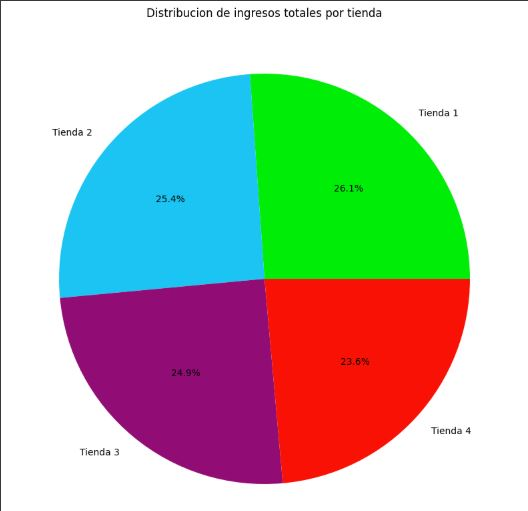

Resultados



*  Tienda 1:   El total de ventas  de la tienda 1 es  $1,150,880,400.00 es la tienda que mas ingresos ha logrado generar y los principales productos vendidos son :Armario,TV LED UHD 4K.

*   Tienda 2: El total de ventas  de la tienda 2 es  $1,116,343,500.00 obutvo un muy buen desempeño, impulsado por productos tales como  Iniciando en programación que obtuvo 65 millones de ventas.




*   Tienda 3: El total de ventas  de la tienda 1 es  $1,150,880,400.00 obutvo ingresos equilibrados siendo los muebles entre las ventas mas destacadas.



*   Tienda 4: El total de ventas  de la tienda 4 es  $1,038,375,700.00 esta  es la tienda que menos ingresos ha generado



**Observaciones**:La tienda 1 compensa las ventas de las demas tiendas con productos de mayor valor,mientras que la tienda 4 con un volumen de ventas similar genero menos ingresos, provocando margenes mas bajos o una oferta que es menos competitiva.



# 3)_ Analisis de calificaciones

El siguiente gráfico de barras muestra las calificaciones promedio por tienda:

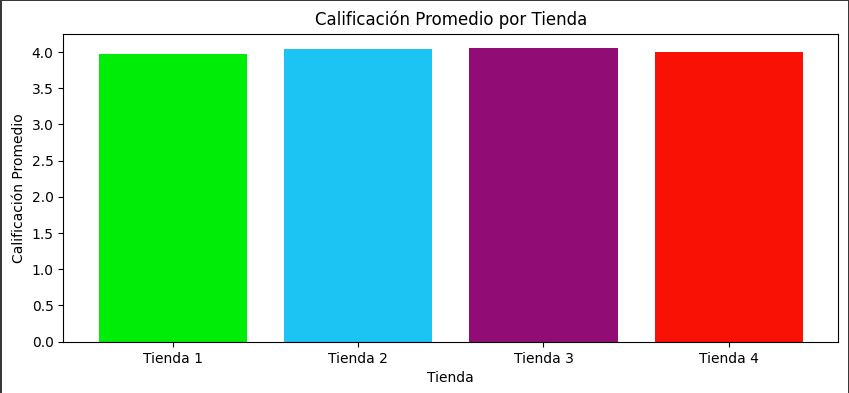

**Resultados**


*   Tienda 1: 3.98
*   Tienda 2: 4.04
*   Tienda 3: 4.05
*   Tienda 4: 4.00

**Observaciones**: La tienda 3 es la lider en satisfaccion al cliente, mientras que la tienda  1 tiene la peor calificacion







# 4)_Analisis de envio


El siguiente gráfico de barras muestra los costos de envío promedio por tienda:



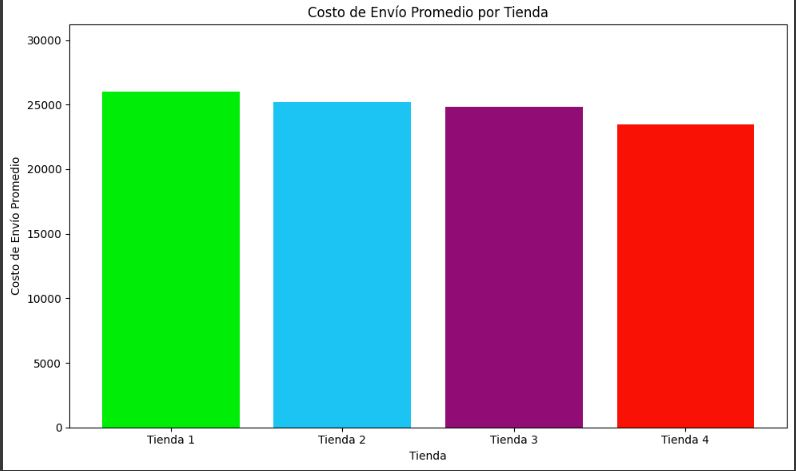

**Resultados**



*   Tienda 1: $26,018.61
*   Tienda 2: $25,216.24
*   Tienda 3: $24,805.68
*   Tienda 4: $23,459.46

Observaciones:La tienda 1 es la que ha tenido un costo de envio mas alto, mientras que la tienda 4 tiene el costo de envio mas bajo.
La tienda 1 podria mejorar su calificacion si llega a disminuir el precio de los costos de envio.



# 5)_Ventas por categoría

El siguiente gráfico de líneas compara las ventas por categoría de producto entre las tiendas:


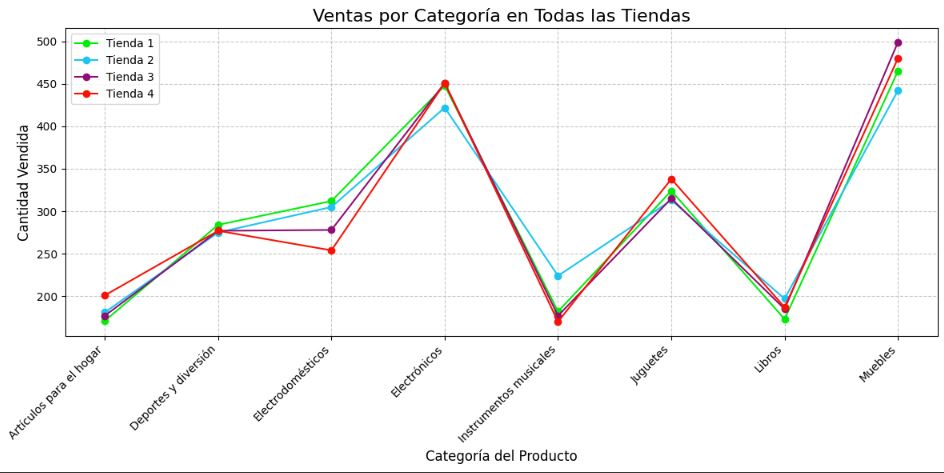

**Resultados:**



*   Categorias principales:Los electrodomesticos y los muebles han sido los mas vendidos.
*   Tienda 3: La tienda 3 destaco en la venta de muebles las cuales fueron de 499 ventas.
*   Tienda 1:Los productos que mas vendio la tienda 1 fueron los electrodomesticos los cuales fueron 448 ventas.
*   Tienda 2:Sobresalieron la venta de libros sobre todo los de Iniciando en la programacion que obtuvo un total de 65 ventas.
*   Tienda 4:Tuvo una venta competitiva en el area de muebles logrando una cantidad de 480 ventas.


**Observaciones:**
La tienda 3 destaca en la venta de muebeles mientras que la tienda 1 destaca en la venta de electrodomesticos explicando asi sus ingresos altos.Por otro lado la tienda 4 aunque tuvo una muy buena venta en muebles tuvo poca diversificacion.

Los siguientes gráficos muestran las ventas por producto para cada tienda:



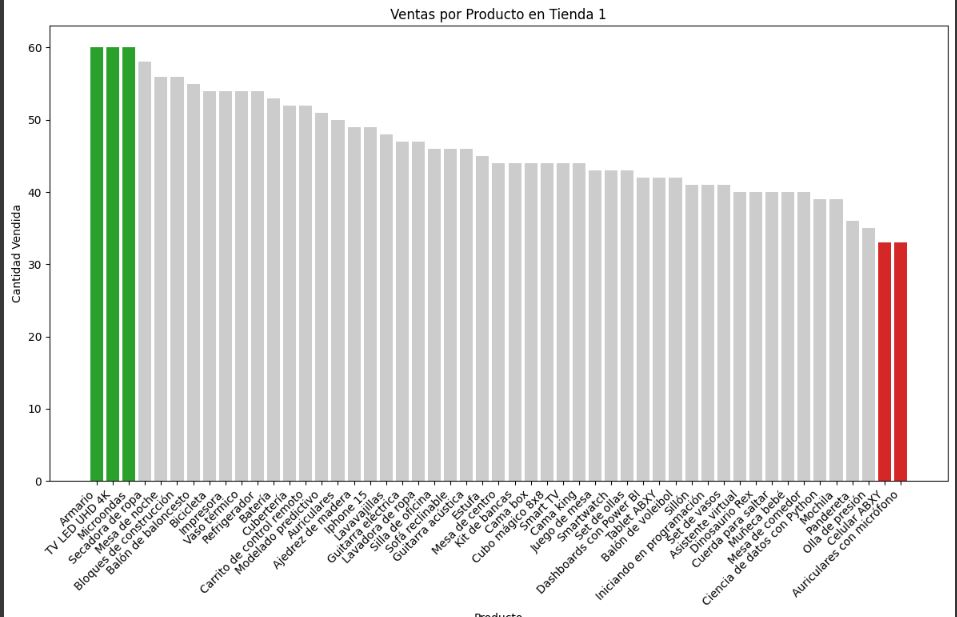

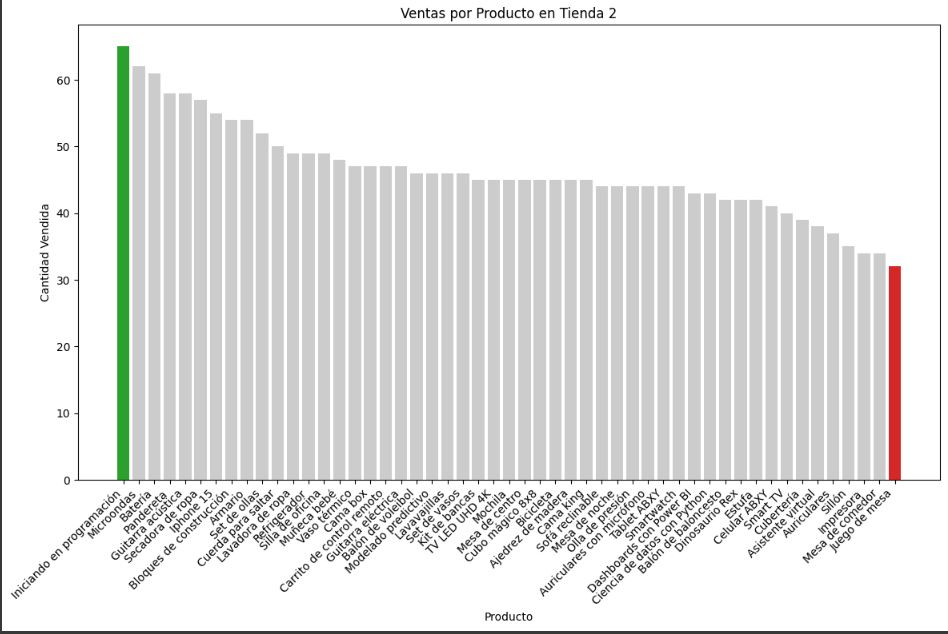

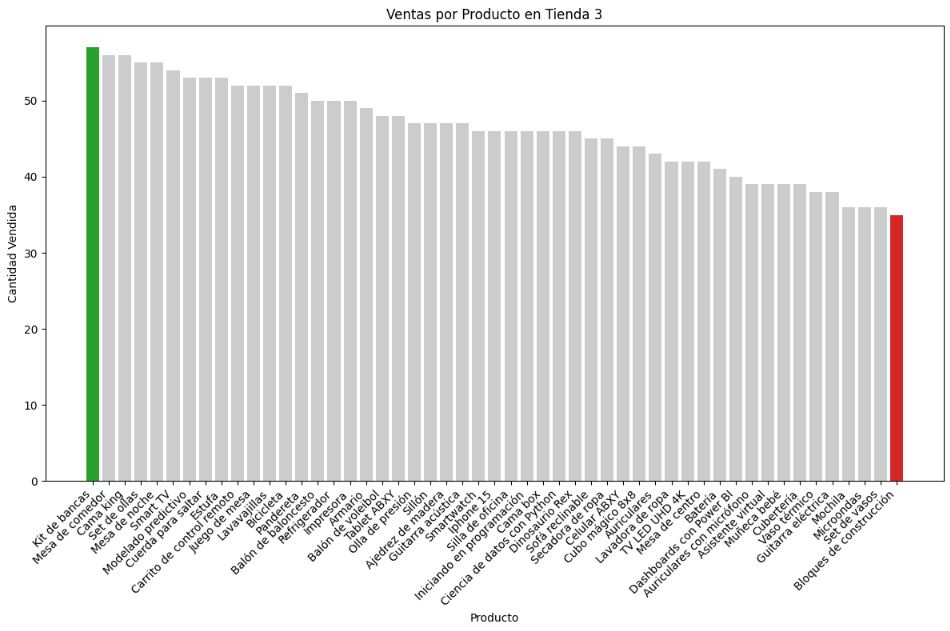


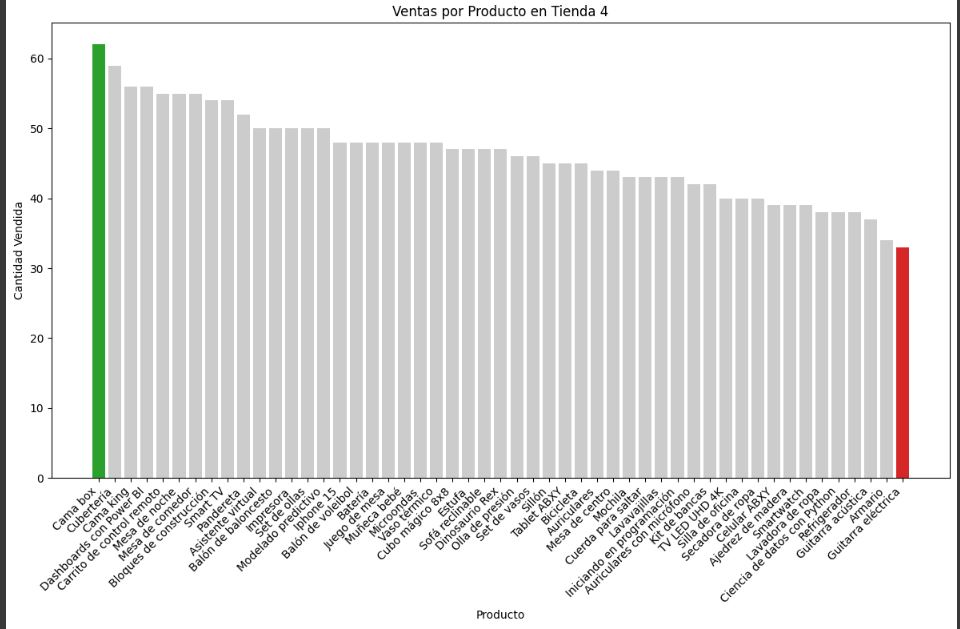



**Resultados**


*   Tienda 1:Los productos que mas se vendieron fueron Armario, TV LED UHD 4K, Microondas (60 ventas cada uno).
*   Tienda 2:El producto mas vendido fue Iniciando en programación (65 ventas).
*   Tienda 3:El producto mas vendido fue  Kit de bancas (57 ventas).
*   Tienda 4:El producto mas vendido fue Cama box (62 ventas).





# Conlcusiones y recomendaciones



*   La tienda 1 fue lider en ingresos , sin embargo se recomienda mejorar la logistica.
*   Las tiendas 2 y 3 tuvieron un desempeño equilibrado, buenas calificaciones y costos de envio competitivos.


*   La tienda 4 obtuvo el menor ingreso y calificación promedio (4.00) y debido a estas circustancias seria conveniente venderla
*   Optimizacion logistica: para mejorar la calificacion de la tienda  1 se recomienda bajar el costo de envio



